<div style="display: flex; background-color: RGB(255,114,0);" >
<h1 style="margin: auto; padding: 30px; ">ANALYSE DES VENTES D'UNE LIBRAIRIE</h1>
</div>

# OBJECTIF DE CE NOTEBOOK

Bienvenue dans l'outil plébiscité par les analystes de données Jupyter.

Il s'agit d'un outil permettant de mixer et d'alterner codes, textes et graphique.

Cet outil est formidable pour plusieurs raisons:

+ il permet de tester des lignes de codes au fur et à mesure de votre rédaction, de constater immédiatement le résultat d'un instruction, de la corriger si nécessaire.
+ De rédiger du texte pour expliquer l'approche suivie ou les résultats d'une analyse et de le mettre en forme grâce à du code html ou plus simple avec **Markdown**
+ d'agrémenter de graphiques

Pour vous aider dans vos premiers pas à l'usage de Jupyter et de Python, nous avons rédigé ce notebook en vous indiquant les instructions à suivre.

Il vous suffit pour cela de saisir le code Python répondant à l'instruction donnée.

Vous verrez de temps à autre le code Python répondant à une instruction donnée mais cela est fait pour vous aider à comprendre la nature du travail qui vous est demandée.

Et garder à l'esprit, qu'il n'y a pas de solution unique pour résoudre un problème et qu'il y a autant de résolutions de problèmes que de développeurs ;)...



<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 1 - Importation des librairies et chargement des fichiers</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">1.1 - Importation des librairies</h3>
</div>

In [4]:
#Importation de la librairie Pandas
import pandas as pd
import matplotlib.pyplot as plt

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">1.2 - Chargements des fichiers</h3>
</div>

In [6]:
#Importation du fichier customers.csv
df_customers = pd.read_csv("customers.csv",header=0, sep = ";")
#Importation du fichier erp.xlsxproducts.csv
df_products = pd.read_csv("products.csv",header=0, sep = ";")
#importation du fichier Transactions.csv
df_transactions = pd.read_csv("Transactions.csv",header=0, sep = ";")

<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 2 - Analyse exploratoire des fichiers</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1 - Analyse exploratoire du fichier customers.csv</h3>
</div>

In [8]:
#Afficher les dimensions du dataset
print("Le tableau comporte {} observation(s) ou article(s)".format(df_customers.shape[0]))
print("Le tableau comporte {} colonne(s)".format(df_customers.shape[1]))
valeur_par_colonne = df_customers.count()
print(valeur_par_colonne)

Le tableau comporte 8621 observation(s) ou article(s)
Le tableau comporte 3 colonne(s)
client_id    8621
sex          8621
birth        8621
dtype: int64


In [9]:
#Consulter le nombre de colonnes
#La nature des données dans chacune des colonnes
#Le nombre de valeurs présentes dans chacune des colonnes
df_customers.dtypes


client_id    object
sex          object
birth         int64
dtype: object

In [10]:
#Afficher les 5 premières lignes de la table
display(df_customers.head(5))

,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943


In [11]:
#Consulter le nombre de colonnes
#La nature des données dans chacune des colonnes
#Le nombre de valeurs présentes dans chacune des colonnes
df_customers.dtypes


client_id    object
sex          object
birth         int64
dtype: object

In [12]:
#Vérifier si il y a les lignes en doublons dans la colonne client_id
doublons = df_customers['client_id'].duplicated()
nombre_doublons = doublons.sum()
print("Nombre de lignes en doublon : ", nombre_doublons)

Nombre de lignes en doublon :  0


In [13]:
lien_colonne = df_customers.corr()
print(lien_colonne)

       birth
birth    1.0


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1.1 - Analyse exploratoire du fichier df_products</h3>
</div>

In [14]:
#Afficher les dimensions du dataset
print("Le tableau comporte {} observation(s) ou article(s)".format(df_products.shape[0]))
print("Le tableau comporte {} colonne(s)".format(df_products.shape[1]))
valeur_par_colonne = df_products.count()
print(valeur_par_colonne)

Le tableau comporte 3286 observation(s) ou article(s)
Le tableau comporte 3 colonne(s)
id_prod    3286
price      3286
categ      3286
dtype: int64


In [15]:
#Consulter le nombre de colonnes
#La nature des données dans chacune des colonnes
#Le nombre de valeurs présentes dans chacune des colonnes
df_products.dtypes


id_prod     object
price      float64
categ        int64
dtype: object

In [16]:
#Afficher les 5 premières lignes de la table
display(df_products.head(5))

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0


In [17]:
#Vérifier si il y a les lignes en doublons dans la colonne client_id
doublons = df_products['id_prod'].duplicated()
nombre_doublons = doublons.sum()
print("Nombre de lignes en doublon : ", nombre_doublons)

Nombre de lignes en doublon :  0


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1.1.1 - Analyse de la variable PRIX</h3>
</div>

In [18]:
###############
## LES PRIX  ##
###############

#Vérification des prix: Y a t-il des prix non renseignés, négatif ou nul?
liste_prix_nul = df_products.loc[df_products['price']  <= 0]
display(liste_prix_nul)
#Afficher le ou les prix non renseignés dans la colonne "price"
print("Nombres d'article avec un prix non renseignés: {}".format(liste_prix_nul)) #Saisir l'instruction manquante dans la fonction format
#Afficher le prix minimum de la colonne "price"
prix_minimum = df_products['price'].min()
print("Prix minimum: {}".format(prix_minimum)) 

#Afficher le prix maximum de la colonne "price"
prix_maximum = df_products['price'].max()
print("Prix maximum: {}".format(prix_maximum)) 
#Affichier les prix inférieurs à 0 (qu'est ce qu'il faut en faire ?)
liste_prix_nul = df_products.loc[df_products['price']  <= 0]
display(liste_prix_nul)


,id_prod,price,categ


Nombres d'article avec un prix non renseignés: Empty DataFrame
Columns: [id_prod, price, categ]
Index: []
Prix minimum: 0.62
Prix maximum: 300.0


,id_prod,price,categ


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1.1 - Analyse exploratoire du fichier df_transactions</h3>
</div>

In [20]:
#Afficher les dimensions du dataset
print("Le tableau comporte {} observation(s) ou article(s)".format(df_transactions.shape[0]))
print("Le tableau comporte {} colonne(s)".format(df_transactions.shape[1]))
valeur_par_colonne = df_transactions.count()
print(valeur_par_colonne)

Le tableau comporte 1048575 observation(s) ou article(s)
Le tableau comporte 4 colonne(s)
id_prod       687534
date          687534
session_id    687534
client_id     687534
dtype: int64


In [21]:
#Consulter le nombre de colonnes
#La nature des données dans chacune des colonnes
#Le nombre de valeurs présentes dans chacune des colonnes
df_transactions.dtypes


id_prod       object
date          object
session_id    object
client_id     object
dtype: object

In [22]:
#Afficher les 5 premières lignes de la table
display(df_transactions.head(5))

,id_prod,date,session_id,client_id
0,0_1259,2021-03-01 00:01:07.843138,s_1,c_329
1,0_1390,2021-03-01 00:02:26.047414,s_2,c_664
2,0_1352,2021-03-01 00:02:38.311413,s_3,c_580
3,0_1458,2021-03-01 00:04:54.559692,s_4,c_7912
4,0_1358,2021-03-01 00:05:18.801198,s_5,c_2033


In [23]:

# Vérification des valeurs manquantes
empty_rows = df_transactions[df_transactions.isnull().any(axis=1)]
print(empty_rows)
df_transactions.dropna(how='all', inplace=True)
invalid_rows = df_transactions[df_transactions.isnull().all(axis=1)]
print(invalid_rows)

        id_prod date session_id client_id
687534      NaN  NaN        NaN       NaN
687535      NaN  NaN        NaN       NaN
687536      NaN  NaN        NaN       NaN
687537      NaN  NaN        NaN       NaN
687538      NaN  NaN        NaN       NaN
...         ...  ...        ...       ...
1048570     NaN  NaN        NaN       NaN
1048571     NaN  NaN        NaN       NaN
1048572     NaN  NaN        NaN       NaN
1048573     NaN  NaN        NaN       NaN
1048574     NaN  NaN        NaN       NaN

[361041 rows x 4 columns]
Empty DataFrame
Columns: [id_prod, date, session_id, client_id]
Index: []


In [24]:
# Sélectionner les lignes où le numéro de client ne commence pas par "ct_"
clients_ct = df_transactions.loc[~df_transactions['client_id'].str.startswith('c_'), 'client_id'].tolist()

display(clients_ct)

[]

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1.1.2 - Fusion dataframe produit et transaction</h3>
</div>

In [25]:
## Fusion des DataFrames df_transactions et df_products
df_merge = pd.merge(df_transactions, df_products, on='id_prod')
display(df_merge)
# Calcul du nombre d'articles vendus et du chiffre d'affaires pour chaque produit
df_summary = df_merge.groupby(['id_prod', 'price', 'categ'])\
                     .agg(nb_articles=('id_prod', 'count'), chiffre_affaires=('price', 'sum'))\
                     .reset_index()

# Affichage du DataFrame de synthèse
display(df_summary)

,id_prod,date,session_id,client_id,price,categ
0,0_1259,2021-03-01 00:01:07.843138,s_1,c_329,11.99,0
1,0_1259,2021-03-01 10:27:10.675023,s_202,c_1599,11.99,0
2,0_1259,2021-03-04 07:26:01.343183,s_1519,c_1609,11.99,0
3,0_1259,2021-03-05 13:32:43.907997,s_2114,c_107,11.99,0
4,0_1259,2021-03-07 09:47:05.272864,s_2976,c_4215,11.99,0
...,...,...,...,...,...,...
687529,0_1576,2022-10-20 21:09:34.520763,s_285542,c_7954,2.29,0
687530,0_433,2022-02-21 06:11:31.176502,s_168499,c_8069,2.99,0
687531,0_433,2022-06-21 06:11:31.176502,s_226925,c_8069,2.99,0
687532,0_433,2022-08-21 06:11:31.176502,s_256286,c_8069,2.99,0


,id_prod,price,categ,nb_articles,chiffre_affaires
0,0_0,3.75,0,1242,4657.50
1,0_1,10.99,0,487,5352.13
2,0_10,17.95,0,22,394.90
3,0_100,20.60,0,3,61.80
4,0_1000,6.84,0,432,2954.88
...,...,...,...,...,...
3260,2_95,98.99,2,4,395.96
3261,2_96,47.91,2,598,28650.18
3262,2_97,160.99,2,13,2092.87
3263,2_98,149.74,2,1,149.74


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1.1.2 -Chiffre d'affaires par categorie</h3>
</div>

In [26]:
df_ca_par_categorie = df_summary.groupby(['categ']).sum()
display(df_ca_par_categorie)

,price,nb_articles,chiffre_affaires
categ,,,
0,26850.23,415459,4419730.97
1,18796.17,235592,4827657.11
2,25402.10,36483,2780275.02


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Moyenne mobile</h3>
</div>

,id_prod,date,session_id,client_id,price,categ,moyenne_mobile,mois,mois_str
0,0_1259,2021-03-01 00:01:07.843138,s_1,c_329,11.99,0,11.990000,2021-03,2021-03
341,0_1390,2021-03-01 00:02:26.047414,s_2,c_664,19.37,0,15.680000,2021-03,2021-03
1221,0_1352,2021-03-01 00:02:38.311413,s_3,c_580,4.50,0,11.953333,2021-03,2021-03
2225,0_1458,2021-03-01 00:04:54.559692,s_4,c_7912,6.55,0,10.602500,2021-03,2021-03
3290,0_1358,2021-03-01 00:05:18.801198,s_5,c_2033,16.49,0,11.780000,2021-03,2021-03
4396,0_1073,2021-03-01 00:05:44.999018,s_6,c_4908,13.99,0,12.148333,2021-03,2021-03
4944,0_1304,2021-03-01 00:07:04.371179,s_7,c_1609,5.86,0,11.250000,2021-03,2021-03
5268,0_279,2021-03-01 00:07:48.507530,s_6,c_4908,16.99,0,11.964286,2021-03,2021-03
5305,1_445,2021-03-01 00:09:11.523122,s_8,c_7991,23.99,1,12.624286,2021-03,2021-03
6565,1_556,2021-03-01 00:10:20.265265,s_9,c_6171,24.47,1,15.477143,2021-03,2021-03


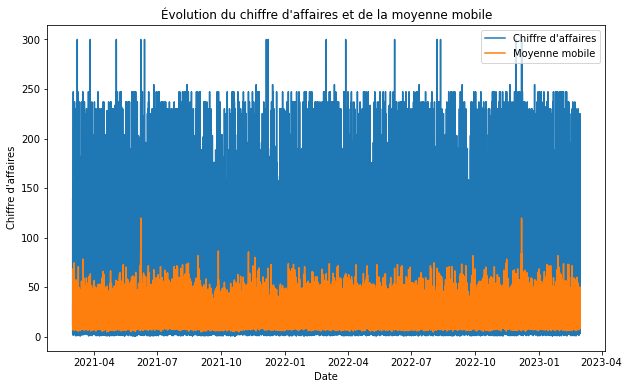

In [54]:

# Trier le DataFrame par ordre croissant de date
df_merge = df_merge.sort_values('date')

# Calculer la moyenne mobile du chiffre d'affaires avec une fenêtre de 7 jours
df_merge['moyenne_mobile'] = df_merge['price'].rolling(window=7, min_periods=1).mean()

# Afficher le DataFrame avec le chiffre d'affaires et la moyenne mobile
display(df_merge.head(10))
# Création du graphique
plt.figure(figsize=(10, 6))
plt.plot(df_merge['date'], df_merge['price'], label='Chiffre d\'affaires')
plt.plot(df_merge['date'], df_merge['moyenne_mobile'], label='Moyenne mobile')
plt.xlabel('Date')
plt.ylabel('Chiffre d\'affaires')
plt.title('Évolution du chiffre d\'affaires et de la moyenne mobile')
plt.legend()
plt.show()

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">nombre de client par mois</h3>
</div>

mois
2021-03    5676
2021-04    5674
2021-05    5644
2021-06    5659
2021-07    5672
2021-08    5642
2021-09    5693
2021-10    6190
2021-11    5875
2021-12    5867
Freq: M, Name: client_id, dtype: int64

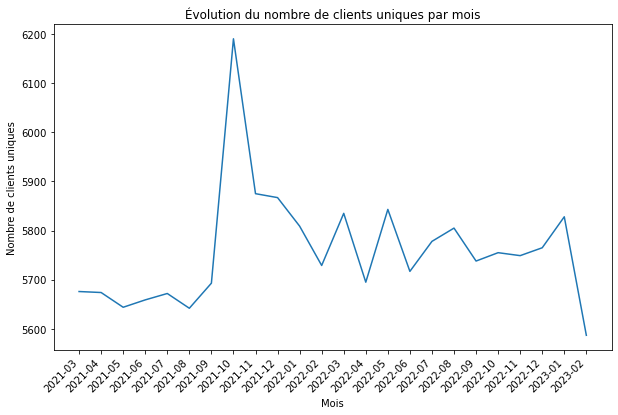

In [28]:
df_merge['date'] = pd.to_datetime(df_merge['date'])
df_merge['mois'] = df_merge['date'].dt.to_period('M')
nb_clients_uniques_par_mois = df_merge.groupby('mois')['client_id'].nunique()
display(nb_clients_uniques_par_mois.head(10))

# Créer le graphique en courbe
fig, ax = plt.subplots(figsize=(10, 6))  # Définir la taille de la figure
ax.plot(nb_clients_uniques_par_mois.index.astype(str), nb_clients_uniques_par_mois.values)
ax.set_xlabel('Mois')
ax.set_ylabel('Nombre de clients uniques')
ax.set_title('Évolution du nombre de clients uniques par mois')
ax.set_xticklabels(nb_clients_uniques_par_mois.index.astype(str), rotation=45, ha='right')
plt.show()

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">nombre de transaction par mois</h3>
</div>

mois
2021-03    28601
2021-04    28443
2021-05    28285
2021-06    26850
2021-07    24738
2021-08    25650
2021-09    33314
2021-10    30022
2021-11    28311
2021-12    32457
Freq: M, dtype: int64


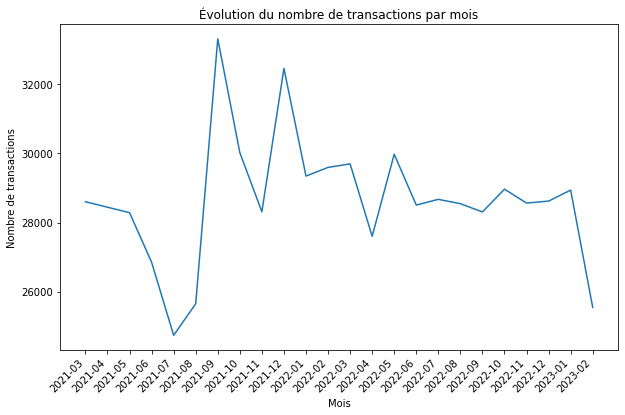

In [29]:
df_merge['date'] = pd.to_datetime(df_merge['date'])
df_merge['mois'] = df_merge['date'].dt.to_period('M')
nb_transactions_par_mois = df_merge.groupby('mois').size()
print(nb_transactions_par_mois.head(10))
## graphique
# Créer le graphique en courbe
df_merge['mois_str'] = df_merge['mois'].astype(str)
nb_transactions_par_mois = df_merge.groupby('mois_str').size()
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(nb_transactions_par_mois.index, nb_transactions_par_mois.values)
ax.set_xlabel('Mois')
ax.set_ylabel('Nombre de transactions')
ax.set_title('Évolution du nombre de transactions par mois')
ax.set_xticklabels(nb_transactions_par_mois.index, rotation=45, ha='right')
plt.show()

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">nombre de produits vendus par mois</h3>
</div>

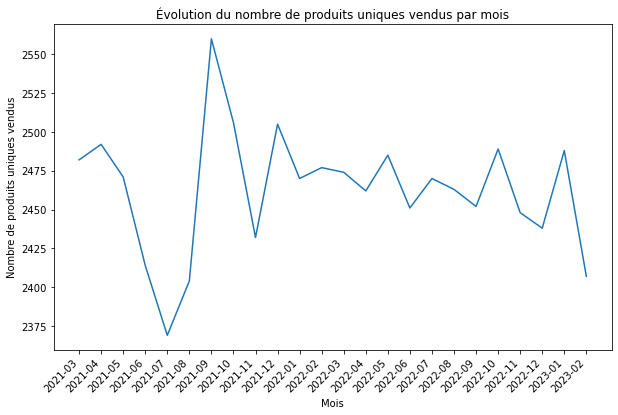

      mois id_prod  nombre_produits_vendus
0  2021-03     0_0                      40
1  2021-03     0_1                      17
2  2021-03    0_10                       2
3  2021-03  0_1000                      19
4  2021-03  0_1001                      21
5  2021-03  0_1002                      26
6  2021-03  0_1003                      15
7  2021-03  0_1004                      21
8  2021-03  0_1007                      16
9  2021-03  0_1008                      14
   id_prod  nombre_produits_vendus
0      0_0                      40
10  0_1009                      30
5   0_1002                      26
18  0_1023                      25
12  0_1013                      25
13  0_1015                      23
17  0_1021                      22
11  0_1011                      21
4   0_1001                      21
7   0_1004                      21
15  0_1018                      21
3   0_1000                      19
16  0_1020                      19
1      0_1                      17
14

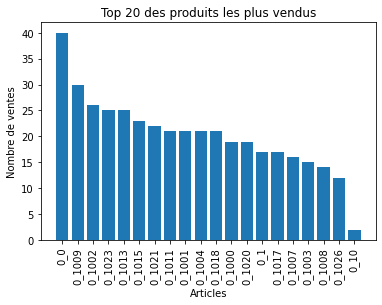

In [31]:
df_merge['date'] = pd.to_datetime(df_merge['date'])
df_merge['mois'] = df_merge['date'].dt.to_period('M')
# Créer un dataframe avec le nombre de produits uniques vendus par mois
produits_uniques_vendus_par_mois = df_merge.groupby('mois_str')['id_prod'].nunique()

# Créer le graphique en courbe
fig, ax = plt.subplots(figsize=(10, 6))  # Définir la taille de la figure
ax.plot(produits_uniques_vendus_par_mois.index, produits_uniques_vendus_par_mois.values)
ax.set_xlabel('Mois')
ax.set_ylabel('Nombre de produits uniques vendus')
ax.set_title('Évolution du nombre de produits uniques vendus par mois')
ax.set_xticklabels(produits_uniques_vendus_par_mois.index, rotation=45, ha='right')
plt.show()

produits_vendus_par_mois = df_merge.groupby(['mois', 'id_prod']).size().reset_index(name='nombre_produits_vendus')
print(produits_vendus_par_mois.head(10))
top_20_produits = produits_vendus_par_mois.head(20)
top_20_produits = top_20_produits.sort_values('nombre_produits_vendus', ascending=False)
print(top_20_produits[['id_prod', 'nombre_produits_vendus']])

# Création du graphique en barres avec tri décroissant

plt.bar(range(len(top_20_produits)), top_20_produits['nombre_produits_vendus'])
plt.xlabel('Articles')
plt.ylabel('Nombre de ventes')
plt.title('Top 20 des produits les plus vendus')
plt.xticks(range(len(top_20_produits)), top_20_produits['id_prod'], rotation='vertical')



## flop 20 des produits les plus vendus
produits_vendus_par_mois = produits_vendus_par_mois.sort_values('nombre_produits_vendus', ascending=True)
flop_20_produits = produits_vendus_par_mois.head(20)
print(flop_20_produits[['id_prod', 'nombre_produits_vendus']])


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">CA par mois</h3>
</div>

,mois,categ,price


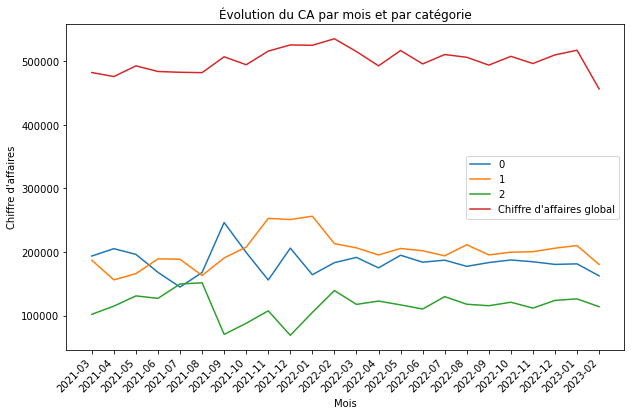

In [32]:
import numpy as np
import matplotlib.pyplot as plt

# Convertir la colonne 'date' en format de date
df_merge['date'] = pd.to_datetime(df_merge['date'])
df_merge['mois'] = df_merge['date'].dt.to_period('M')

# Calculer le chiffre d'affaires par mois et par catégorie
tab_CA_par_mois_categorie = df_merge.groupby(['mois', 'categ'])['price'].sum().reset_index()
mois_CA_0 = tab_CA_par_mois_categorie[tab_CA_par_mois_categorie['price'] == 0]
display(mois_CA_0)

# Créer le graphique en courbes
fig, ax = plt.subplots(figsize=(10, 6))

# Parcourir chaque catégorie pour tracer la courbe correspondante
categories = tab_CA_par_mois_categorie['categ'].unique()
for categorie in categories:
    ca_par_mois_categorie = tab_CA_par_mois_categorie[tab_CA_par_mois_categorie['categ'] == categorie]
    ax.plot(ca_par_mois_categorie['mois'].astype(str), ca_par_mois_categorie['price'], label=categorie)

# Calculer le chiffre d'affaires total par mois
chiffre_affaires_total = df_merge.groupby('mois')['price'].sum().reset_index()

# Ajouter la courbe du chiffre d'affaires global
ax.plot(chiffre_affaires_total['mois'].astype(str), chiffre_affaires_total['price'], label='Chiffre d\'affaires global')

ax.set_xlabel('Mois')
ax.set_ylabel('Chiffre d\'affaires')
ax.set_title('Évolution du CA par mois et par catégorie')
ax.legend()
ax.set_xticklabels(df_merge['mois'].dt.strftime('%Y-%m').unique(), rotation=45, ha='right')

plt.show()

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">client BtoB</h3>
    Pour retrouver ces clients j'ai pris les clients ayant le plus de transaction et de CA
</div>

In [34]:
top_clients_chiffre_affaires = df_merge.groupby('client_id')['price'].sum().nlargest(4)
top_clients_transactions = df_merge['client_id'].value_counts().nlargest(4)
print(top_clients_chiffre_affaires)
print(top_clients_transactions)
# ratio chiffre d'affaires client BtoB ar rapport au CA global
# Calculer le chiffre d'affaires cumulé des 4 clients spécifiques
chiffre_affaires_clients = df_merge.groupby('client_id')['price'].sum()
chiffre_affaires_4_clients = chiffre_affaires_clients.loc[['c_1609', 'c_4985', 'c_6714', 'c_3454']].sum()

# Calculer la somme de tous les chiffres d'affaires
chiffre_affaires_total = chiffre_affaires_clients.sum()
print(chiffre_affaires_4_clients)
print(chiffre_affaires_clients.sum())
# Calculer le ratio
ratio = chiffre_affaires_4_clients / chiffre_affaires_total
ratio_en_pourcentage_arrondi = round(ratio, 2)*100

print("Le ratio entre le chiffre d'affaires cumulé des 4 clients spécifiques et la totalité du chiffre d'affaires est :", ratio_en_pourcentage_arrondi, "%")


client_id
c_1609    326039.89
c_4958    290227.03
c_6714    153918.60
c_3454    114110.57
Name: price, dtype: float64
c_1609    25586
c_6714     9199
c_3454     6793
c_4958     5222
Name: client_id, dtype: int64
595242.1099999507
12027663.099999933
Le ratio entre le chiffre d'affaires cumulé des 4 clients spécifiques et la totalité du chiffre d'affaires est : 5.0 %


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Repartition des produits par catégorie</h3>
</div>

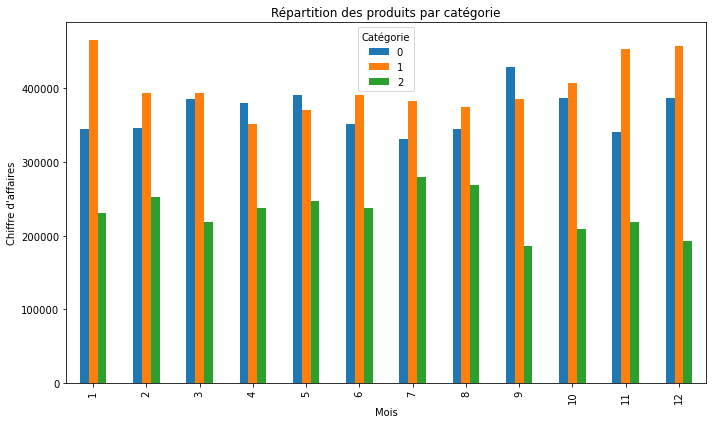

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Fusionner les dataframes df_transactions et df_products
df_merged = pd.merge(df_transactions, df_products, on='id_prod')

# 2. Convertir la colonne 'date' en format de date et extraire le mois
df_merged['date'] = pd.to_datetime(df_merged['date'])
df_merged['month'] = df_merged['date'].dt.month

# 3. Grouper les données par mois et catégorie, puis calculer le chiffre d'affaires par mois
revenues = df_merged.groupby(['month', 'categ'])['price'].sum().reset_index()

# 4. Créer un dataframe pivoté pour le graphique en barres
revenues_pivot = revenues.pivot_table(index='month', columns='categ', values='price', fill_value=0)

# 5. Agrandir le graphique en définissant la taille de la figure et en ajustant les paramètres
fig, ax = plt.subplots(figsize=(10, 6))  # Définir la taille de la figure

# 6. Créer le graphique en barres
revenues_pivot.plot(kind='bar', ax=ax)
plt.xlabel('Mois')
plt.ylabel('Chiffre d\'affaires')
plt.title('Répartition des produits par catégorie')
plt.legend(title='Catégorie')

# 7. Afficher le graphique agrandi
plt.tight_layout()  # Ajuster la disposition du graphique
plt.show()

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Corrélation entre genre et categorie</h3>
</div>

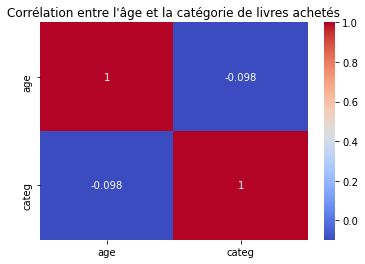

In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Ajout de la colonne age
df_customers['birth'] = pd.to_numeric(df_customers['birth'])

# Calculate age using birth year and current year
current_year = 2021
df_customers['age'] = current_year - df_customers['birth']

# Effectuer la fusion entre df_merge et df_customers par la colonne 'client_id'
df_merged = pd.merge(df_merge, df_customers[['client_id', 'age']], on='client_id', how='left')

# Calculer la corrélation entre l'âge et la catégorie de livres achetés
correlation_matrix = df_merged[['age', 'categ']].corr()

# Afficher le graphique de corrélation
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Corrélation entre l'âge et la catégorie de livres achetés")
plt.show()

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Corrélation entre genre et ca</h3>
</div>

In [38]:
# Jointure des dataframes df_customers, df_transactions et df_products
df_merged = pd.merge(df_customers, df_transactions, on='client_id', how='inner')
df_merged = pd.merge(df_merged, df_products, on='id_prod', how='inner')
# Calcul du chiffre d'affaires par client
df_ca = df_merged.groupby('client_id')['price'].sum().reset_index()
df_ca = df_ca.rename(columns={'price': 'CA'})
# Calcul de la corrélation entre l'âge du client et le montant du chiffre d'affaires (CA)
correlation = df_customers['age'].corr(df_ca['CA'])
# Affichage du résultat
print("Coefficient de corrélation de Pearson entre l'âge du client et le chiffre d'affaires :", correlation)
display (df_merged)

Coefficient de corrélation de Pearson entre l'âge du client et le chiffre d'affaires : 0.0013946527563302837


,client_id,sex,birth,age,id_prod,date,session_id,price,categ
0,c_4410,f,1967,54,1_483,2021-03-13 21:35:55.949042,s_5913,15.99,1
1,c_4410,f,1967,54,1_483,2022-03-13 21:35:55.949042,s_178686,15.99,1
2,c_4410,f,1967,54,1_483,2022-05-13 21:35:55.949042,s_208054,15.99,1
3,c_6446,m,1971,50,1_483,2021-10-21 16:09:28.332092,s_109855,15.99,1
4,c_7049,f,1987,34,1_483,2021-10-02 00:06:53.783104,s_100270,15.99,1
...,...,...,...,...,...,...,...,...,...
687529,c_8138,f,1984,37,0_394,2021-11-09 09:02:38.299240,s_116986,2.14,0
687530,c_8138,f,1984,37,0_394,2022-03-09 09:02:38.299240,s_176587,2.14,0
687531,c_8138,f,1984,37,0_394,2022-08-09 09:02:38.299240,s_250653,2.14,0
687532,c_8327,m,1972,49,0_394,2021-12-28 22:44:11.200205,s_141516,2.14,0


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Corrélation entre l'age et la frequence d'achat</h3>
</div>

In [40]:
df_panier_moyen = df_merged.groupby('client_id')['price'].sum().reset_index()
df_transactions_count = df_merged.groupby('client_id')['id_prod'].count().reset_index()
df_panier_moyen['transactions_count'] = df_transactions_count['id_prod']
df_panier_moyen['panier_moyen'] = df_panier_moyen['price'] / df_panier_moyen['transactions_count']
correlation = df_customers['age'].corr(df_panier_moyen['transactions_count'])
print("Coefficient de corrélation de Pearson entre l'âge du client et la fréquence des transactions :", correlation)

Coefficient de corrélation de Pearson entre l'âge du client et la fréquence des transactions : 0.007743265640795426


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">recherche valeur aberrante en age et en prix</h3>
</div>

Valeurs aberrantes détectées :


,client_id,sex,birth,age,id_prod,date,session_id,price,categ
23,c_5113,m,1951,70,1_483,2021-07-16 09:53:04.131744,s_63014,15.99,1
33,c_6468,m,1942,79,1_483,2021-12-07 18:02:47.494835,s_130880,15.99,1
34,c_6468,m,1942,79,1_483,2022-06-07 18:02:47.494835,s_220296,15.99,1
35,c_6468,m,1942,79,1_483,2022-08-07 18:02:47.494835,s_249847,15.99,1
36,c_6468,m,1942,79,1_483,2022-12-07 18:02:47.494835,s_308523,15.99,1
...,...,...,...,...,...,...,...,...,...
687445,c_87,m,1949,72,1_136,2022-12-02 08:35:12.361418,s_305957,31.72,1
687472,c_2119,f,1943,78,0_1459,2022-01-21 00:48:09.009192,s_152841,0.99,0
687473,c_2119,f,1943,78,0_1459,2023-02-21 00:48:09.009192,s_344613,0.99,0
687486,c_1063,m,1939,82,0_1670,2021-09-21 15:03:28.664989,s_93276,23.59,0


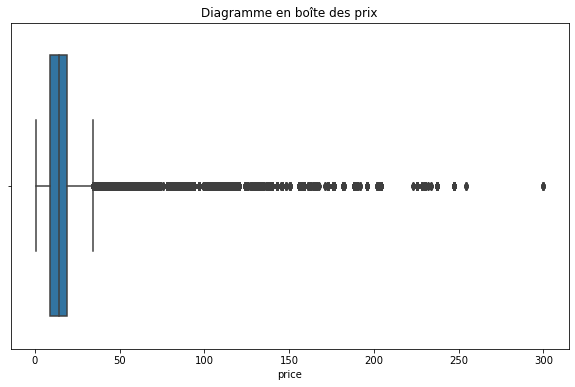

In [41]:
# Calcul de la médiane et de l'écart absolu médian
median = df_merged['age'].median()
mad = np.median(np.abs(df_merged['age'] - median))

# Calcul des seuils d'acceptation
threshold = 3
lower_threshold = median - (threshold * mad)
upper_threshold = median + (threshold * mad)

# Identification des valeurs aberrantes
outliers = df_merged[(df_merged['age'] < lower_threshold) | (df_merged['age'] > upper_threshold)]

# Affichage des valeurs aberrantes
print("Valeurs aberrantes détectées :")
display(outliers)
import seaborn as sns
fig, ax = plt.subplots(figsize=(10, 6))
# Création d'un boxplot pour la colonne des prix
sns.boxplot(x=df_merged['price'])

# Affichage du boxplot
plt.title("Diagramme en boîte des prix")
plt.show()

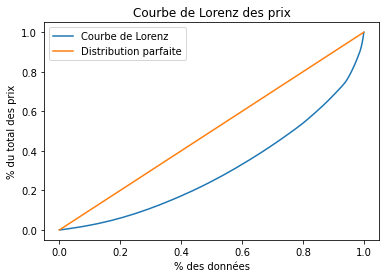

In [42]:
import numpy as np
import matplotlib.pyplot as plt

# Tri des valeurs de prix par ordre croissant
sorted_prices = np.sort(df_merged['price'])

# Calcul des quantités cumulées
cumulative_percentages = np.cumsum(sorted_prices) / np.sum(sorted_prices)

# Courbe de Lorenz
plt.plot(np.linspace(0, 1, len(cumulative_percentages)), cumulative_percentages, label='Courbe de Lorenz')

# Courbe de référence parfaite
plt.plot(np.linspace(0, 1, len(cumulative_percentages)), np.linspace(0, 1, len(cumulative_percentages)), label='Distribution parfaite')

# Paramètres de la courbe
plt.title('Courbe de Lorenz des prix')
plt.xlabel('% des données')
plt.ylabel('% du total des prix')
plt.legend()

# Affichage de la courbe de Lorenz
plt.show()

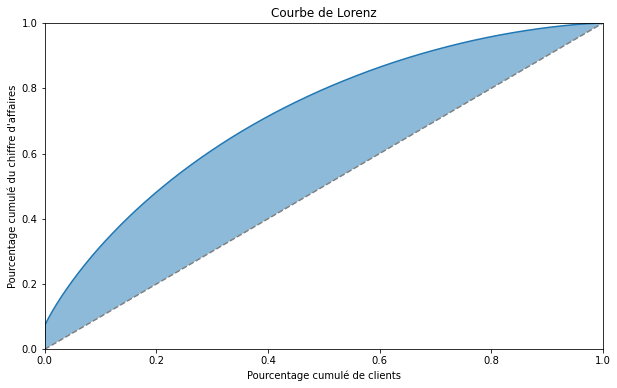

In [43]:
chiffre_affaires_client = df_merge.groupby('client_id')['price'].sum().reset_index()
chiffre_affaires_client = chiffre_affaires_client.sort_values('price', ascending=False)
chiffre_affaires_cumule = chiffre_affaires_client['price'].cumsum() / chiffre_affaires_client['price'].sum()
pourcentage_clients_cumule = np.arange(0, 1, 1/len(chiffre_affaires_cumule))
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(pourcentage_clients_cumule, chiffre_affaires_cumule)
ax.plot([0, 1], [0, 1], linestyle='--', color='gray')
ax.fill_between(pourcentage_clients_cumule, pourcentage_clients_cumule, chiffre_affaires_cumule, alpha=0.5)
ax.set_xlabel('Pourcentage cumulé de clients')
ax.set_ylabel('Pourcentage cumulé du chiffre d\'affaires')
ax.set_title('Courbe de Lorenz')
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
plt.show()

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">valeur statistique khi²</h3>
</div>

In [53]:
from scipy.stats import chi2_contingency
# Convertir la colonne 'date' en format de date
df_merged['date'] = pd.to_datetime(df_merged['date'])

# Extrait le mois à partir de la colonne 'date'
df_merged['mois'] = df_merged['date'].dt.to_period('M')

# Groupement par catégorie de produit et mois, et comptage des ventes
ventes_par_categorie = df_merged.groupby(['categ', 'mois']).size().reset_index(name='nombre_ventes')

# Affichage du nouveau dataframe
print(ventes_par_categorie)
# Réorganiser les données en un tableau de contingence
tableau_contingence = pd.pivot_table(ventes_par_categorie, values='nombre_ventes', index='mois', columns='categ', fill_value=0)

# Application du test du khi²
stat, p_value, dof, expected = chi2_contingency(tableau_contingence)

# Affichage des résultats
print(f"Statistique du test : {stat}")
print(f"P-valeur : {p_value}")
print(f"Degrés de liberté : {dof}")
print("Fréquences théoriques attendues :")
print(expected)

    categ     mois  nombre_ventes
0       0  2021-03          18131
1       0  2021-04          19342
2       0  2021-05          18501
3       0  2021-06          15898
4       0  2021-07          13578
..    ...      ...            ...
67      2  2022-10           1574
68      2  2022-11           1456
69      2  2022-12           1621
70      2  2023-01           1618
71      2  2023-02           1501

[72 rows x 3 columns]
Statistique du test : 6446.895763111059
P-valeur : 0.0
Degrés de liberté : 46
Fréquences théoriques attendues :
[[17282.84398881  9800.48520073  1517.67081046]
 [17187.36867849  9746.34455314  1509.28676836]
 [17091.89336818  9692.20390555  1500.90272627]
 [16224.76001187  9200.483467    1424.75652113]
 [14948.53307909  8476.78063339  1312.68628751]
 [15499.63107279  8789.28867518  1361.08025203]
 [20130.78789703 11415.45274561  1767.75935736]
 [18141.5175075  10287.40836671  1593.07412579]
 [17107.6044952   9701.11312604  1502.28237876]
 [19612.92497971 11121.79